<a href="https://colab.research.google.com/github/diagomike/Amharic_cleaners/blob/master/FakeYou_Tacotron_2_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><font color="pink" size="+2"> **FakeYou Tacotron 2 *(w/ARPAbet)* Training Colab**

### [Tacotron 2](https://github.com/NVIDIA/tacotron2)
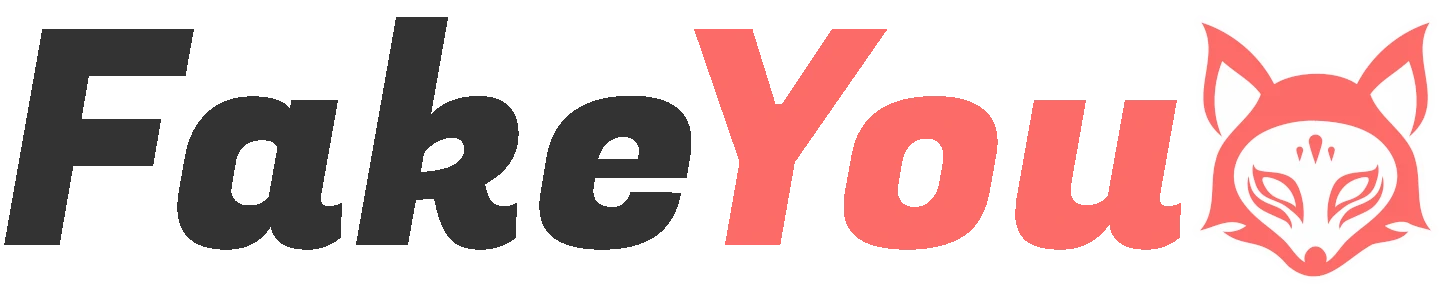
### [FakeYou](https://fakeyou.com/)
---

### **Disclaimer:**  You may encounter difficulties when uploading files (> 1MB) if you use firefox.
---

#### Special thanks to Cookie from the Pony Preservation Project
###### Slight modifications by mega b, anonymous and justinjohn-03

# **Setup**

In [1]:
#@title ## <b><font color="pink" size="+2"> Check GPU
_, card = !nvidia-smi --query-gpu=gpu_name --format='csv'
print(card)

Tesla T4


In [2]:
#@markdown ## <b><font color="pink" size="+2"> Step:1 **Mount your Google Drive**

from google.colab import drive
import os
from os.path import exists
if not exists('/content/drive'):
    drive.mount('drive', force_remount=True)

In [3]:
#@markdown ## <b><font color="pink" size="+2"> **Step:2** **Install Tacotron2 (w/ARPAbet)**
import os
%cd /content/
# if not os.path.isdir("/content/TTS-TT2/"):
#   print("Cloning justinjohn0306/TTS-TT2")
#   !git clone https://github.com/justinjohn0306/TTS-TT2.git
#   %cd /content/TTS-TT2/
#   !git submodule init
#   !git submodule update
# %cd /content/TTS-TT2/
#NVIDIA's requirements
#I believe Colab gives us PyTorch and TF by default so we don't need anything else
#Versions specified in requirements.txt have conflicts so that's why we simply get current versions 
print("Downloading tacotron2 requirements")
!pip install matplotlib numpy inflect scipy Unidecode pillow
#Our requirements
#We'll need gdown to download some really cool things
!pip install git+https://github.com/wkentaro/gdown.git
import gdown
# !git submodule init
# !git submodule update
!pip install ffmpeg-normalize
!pip install -q unidecode tensorboardX
!apt-get -qq install sox
!apt-get install pv
!apt-get install jq
# !wget https://raw.githubusercontent.com/tonikelope/megadown/master/megadown -O megadown.sh
# !chmod 755 megadown.sh
#Download NVIDIA's LJSpeech model
# tt2_pretrained = "https://drive.google.com/uc?id=1c5ZTuT7J08wLUoVZ2KkUs_VdZuJ86ZqA"
# if not os.path.isfile("/content/TTS-TT2/pretrained_model"):
#   print("Downloading tt2 pretrained")
#   gdown.download(tt2_pretrained, "/content/TTS-TT2/pretrained_model", quiet=False)
# if not os.path.isfile("/content/TTS-TT2/text/merged.dict.txt"):
#   print("Applying cmudict patch")
#   # !curl https://cdn.discordapp.com/attachments/820353681567907901/865742324084244480/tacotron2-cmudict-patch.zip -o /content/tacotron2-cmudict-patch.zip
#   gdown.download("https://drive.google.com/uc?id=1xgtiHABttD4MTds4KUPjghXfLqvzln2_", "/content/tacotron2-cmudict-patch.zip", quiet=False)
#   !unzip -o /content/tacotron2-cmudict-patch.zip -d /content/TTS-TT2/text/
#   !mv /content/TTS-TT2/text/merged.dict.txt /content/TTS-TT2/

latest_downloaded = None

/content
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/wkentaro/gdown.git to /tmp/pip-req-build-tl0cg6o6
  Running command git clone --filter=blob:none --quiet https://github.com/wkentaro/gdown.git /tmp/pip-req-build-tl0cg6o6
  Resolved https://github.com/wkentaro/gdown.git to commit 5c7507f02718048899b85d4010a6ed93316cbf27
  Running command git submodule update --init --recursive -q
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for gdown: filename=gdown-4.7.1-py3-none-any.whl size=15753 sha256=20918d1d8c8bed2d979c12702a0a915278ef91d9f73bb09f3776633cb5bfa3c6
  Stored in directory: /tmp/pip-ephem-wheel-cache-mi0grx8p/wheels/fd/60/cb/27c249beb4394fdd33835656e3578fba044b022e1d185b3ba8
Successfully built gdow

In [4]:
import os
os.chdir('/content/drive/MyDrive/Operation/TTS-TT2')

In [5]:
#@markdown ## <b><font color="pink" size="+2"> Step:3 **Apply additional ARPAbet patches**
patches = [
  ("/content/drive/MyDrive/Operation/TTS-TT2/train.patch", """17a18
> from tqdm import tqdm
18a20,26
> from plotting_utils import plot_alignment_to_numpy
> from IPython import display
> from PIL import Image
> 
> def plot_something_to_ipython(alignment):
>   numpoop = plot_alignment_to_numpy(alignment)
>   display.display(Image.fromarray(numpoop))
28,29c36,37
<     assert torch.cuda.is_available(), "Distributed mode requires CUDA."
<     print("Initializing Distributed")
---
>     assert torch.cuda.is_available(), "distributed mode requires CUDA"
>     print("initializing distributed")
39c47
<     print("Done initializing distributed")
---
>     print("done initializing distributed")
86c94
<     print("Warm starting model from checkpoint '{}'".format(checkpoint_path))
---
>     print("warm starting model from checkpoint '{}'".format(checkpoint_path))
101c109
<     print("Loading checkpoint '{}'".format(checkpoint_path))
---
>     print("loading checkpoint '{}'".format(checkpoint_path))
107c115
<     print("Loaded checkpoint '{}' from iteration {}" .format(
---
>     print("loaded checkpoint '{}' from iteration {}" .format(
113c121
<     print("Saving model and optimizer state at iteration {} to {}".format(
---
>     print("saving model and optimizer state at iteration {} to {}".format(
145c153
<         print("Validation loss {}: {:9f}  ".format(iteration, val_loss))
---
>         print("validation loss {}: {:9f}  ".format(iteration, val_loss))
146a155,161
>         
>         # plot_something_to_ipython
>         # https://github.com/NVIDIA/tacotron2/blob/master/logger.py
>         _, _, _, alignments = y_pred
>         from random import randint
>         idx = randint(0, alignments.size(0)-1)
>         plot_something_to_ipython(alignments[idx].data.cpu().numpy().T)
169a185
>     print("starting with {} learning rate".format(learning_rate))
207,208c223,225
<         print("Epoch: {}".format(epoch))
<         for i, batch in enumerate(train_loader):
---
>         print("starting epoch {} at iteration {}".format(epoch, iteration))
>         epochstart = time.perf_counter()
>         for i, batch in tqdm(enumerate(train_loader)):
240,241c257,258
<                 print("Train loss {} {:.6f} Grad Norm {:.6f} {:.2f}s/it".format(
<                     iteration, reduced_loss, grad_norm, duration))
---
>                 #print("Train loss {} {:.6f} Grad Norm {:.6f} {:.2f}s/it".format(
>                 #    iteration, reduced_loss, grad_norm, duration))
243a261
>             from random import random
245,246c263,266
<             if not is_overflow and (iteration % hparams.iters_per_checkpoint == 0):
<                 validate(model, criterion, valset, iteration,
---
>             iteration += 1
>         print("\nepoch {} took {} seconds".format(epoch, time.perf_counter() - epochstart))
>         #what could possibly go wrong
>         validate(model, criterion, valset, iteration,
248a269
>         if not is_overflow and (random() > 0.66): #(iteration % hparams.iters_per_checkpoint == 0):
251,256c272,280
<                         output_directory, "checkpoint_{}".format(iteration))
<                     save_checkpoint(model, optimizer, learning_rate, iteration,
<                                     checkpoint_path)
< 
<             iteration += 1
< 
---
>                         output_directory, hparams.model_name)
>                     try:
>                         save_checkpoint(model, optimizer, learning_rate, iteration,
>                                         checkpoint_path)
>                     except KeyboardInterrupt:
>                         print("you probably shouldnt ^C while im saving")
>                         save_checkpoint(model, optimizer, learning_rate, iteration,
>                                         checkpoint_path)
>                         print("ok it should be fine now")

"""),
  ("/content/TTS-TT2/plotting_utils.patch", """5c5
< 
---
> import io
9,10c9,13
<     data = np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8, sep='')
<     data = data.reshape(fig.canvas.get_width_height()[::-1] + (3,))
---
>     # no obvious way to make it rgba... https://github.com/matplotlib/matplotlib/issues/5336#issuecomment-388736185
>     buf = io.BytesIO()
>     fig.savefig(buf, format="rgba")
>     data = np.fromstring(buf.getvalue(), dtype=np.uint8, sep='')
>     data = data.reshape(fig.canvas.get_width_height()[::-1] + (4,))
15c18
<     fig, ax = plt.subplots(figsize=(6, 4))
---
>     fig, ax = plt.subplots(figsize=(9, 6))
17c20
<                    interpolation='none')
---
>                    interpolation='none', cmap='inferno')
35c38
<                    interpolation='none')
---
>                    interpolation='none', cmap='inferno')

""")
]
# for i, v in enumerate(patches):
#   to = v[0]
#   co = v[1]
#   with open(to, "w") as file:
#     file.write(co)

from glob import glob 
for x in glob("*.patch"):
  base = x[:-6]
  patch = x
  py = base+".py"
  !patch {py} {patch}
  import time
import logging

logging.getLogger('matplotlib').setLevel(logging.WARNING)
logging.getLogger('numba').setLevel(logging.WARNING)
logging.getLogger('librosa').setLevel(logging.WARNING)


import argparse
import math
from numpy import finfo

import torch
from distributed import apply_gradient_allreduce
import torch.distributed as dist
from torch.utils.data.distributed import DistributedSampler
from torch.utils.data import DataLoader

from model import Tacotron2
from data_utils import TextMelLoader, TextMelCollate
from loss_function import Tacotron2Loss
from logger import Tacotron2Logger
from hparams import create_hparams
 
import random
import numpy as np

import layers
from utils import load_wav_to_torch, load_filepaths_and_text
from text import text_to_sequence
from math import e
#from tqdm import tqdm # Terminal
#from tqdm import tqdm_notebook as tqdm # Legacy Notebook TQDM
from tqdm.notebook import tqdm # Modern Notebook TQDM
from distutils.dir_util import copy_tree
import matplotlib.pylab as plt

def download_from_google_drive(file_id, file_name):
  # download a file from the Google Drive link
  !rm -f ./cookie
  !curl -c ./cookie -s -L "https://drive.google.com/uc?export=download&id={file_id}" > /dev/null
  confirm_text = !awk '/download/ {print $NF}' ./cookie
  confirm_text = confirm_text[0]
  !curl -Lb ./cookie "https://drive.google.com/uc?export=download&confirm={confirm_text}&id={file_id}" -o {file_name}

def create_mels():
    print("Generating Mels")
    stft = layers.TacotronSTFT(
                hparams.filter_length, hparams.hop_length, hparams.win_length,
                hparams.n_mel_channels, hparams.sampling_rate, hparams.mel_fmin,
                hparams.mel_fmax)
    def save_mel(filename):
        audio, sampling_rate = load_wav_to_torch(filename)
        if sampling_rate != stft.sampling_rate:
            raise ValueError("{} {} SR doesn't match target {} SR".format(filename, 
                sampling_rate, stft.sampling_rate))
        audio_norm = audio / hparams.max_wav_value
        audio_norm = audio_norm.unsqueeze(0)
        audio_norm = torch.autograd.Variable(audio_norm, requires_grad=False)
        melspec = stft.mel_spectrogram(audio_norm)
        melspec = torch.squeeze(melspec, 0).cpu().numpy()
        np.save(filename.replace('.wav', ''), melspec)

    import glob
    wavs = glob.glob('wavs/*.wav')
    for i in tqdm(wavs):
        save_mel(i)


def reduce_tensor(tensor, n_gpus):
    rt = tensor.clone()
    dist.all_reduce(rt, op=dist.reduce_op.SUM)
    rt /= n_gpus
    return rt


def init_distributed(hparams, n_gpus, rank, group_name):
    assert torch.cuda.is_available(), "Distributed mode requires CUDA."
    print("Initializing Distributed")

    # Set cuda device so everything is done on the right GPU.
    torch.cuda.set_device(rank % torch.cuda.device_count())

    # Initialize distributed communication
    dist.init_process_group(
        backend=hparams.dist_backend, init_method=hparams.dist_url,
        world_size=n_gpus, rank=rank, group_name=group_name)

    print("Done initializing distributed")


def prepare_dataloaders(hparams):
    # Get data, data loaders and collate function ready
    trainset = TextMelLoader(hparams.training_files, hparams)
    valset = TextMelLoader(hparams.validation_files, hparams)
    collate_fn = TextMelCollate(hparams.n_frames_per_step)

    if hparams.distributed_run:
        train_sampler = DistributedSampler(trainset)
        shuffle = False
    else:
        train_sampler = None
        shuffle = True

    train_loader = DataLoader(trainset, num_workers=1, shuffle=shuffle,
                              sampler=train_sampler,
                              batch_size=hparams.batch_size, pin_memory=False,
                              drop_last=True, collate_fn=collate_fn)
    return train_loader, valset, collate_fn


def prepare_directories_and_logger(output_directory, log_directory, rank):
    if rank == 0:
        if not os.path.isdir(output_directory):
            os.makedirs(output_directory)
            os.chmod(output_directory, 0o775)
        logger = Tacotron2Logger(os.path.join(output_directory, log_directory))
    else:
        logger = None
    return logger


def load_model(hparams):
    model = Tacotron2(hparams).cuda()
    if hparams.fp16_run:
        model.decoder.attention_layer.score_mask_value = finfo('float16').min

    if hparams.distributed_run:
        model = apply_gradient_allreduce(model)

    return model


def warm_start_model(checkpoint_path, model, ignore_layers):
    assert os.path.isfile(checkpoint_path)
    print("Warm starting model from checkpoint '{}'".format(checkpoint_path))
    checkpoint_dict = torch.load(checkpoint_path, map_location='cpu')
    model_dict = checkpoint_dict['state_dict']
    if len(ignore_layers) > 0:
        model_dict = {k: v for k, v in model_dict.items()
                      if k not in ignore_layers}
        dummy_dict = model.state_dict()
        dummy_dict.update(model_dict)
        model_dict = dummy_dict
    model.load_state_dict(model_dict)
    return model


def load_checkpoint(checkpoint_path, model, optimizer):
    assert os.path.isfile(checkpoint_path)
    print("Loading checkpoint '{}'".format(checkpoint_path))
    checkpoint_dict = torch.load(checkpoint_path, map_location='cpu')
    model.load_state_dict(checkpoint_dict['state_dict'])
    optimizer.load_state_dict(checkpoint_dict['optimizer'])
    learning_rate = checkpoint_dict['learning_rate']
    iteration = checkpoint_dict['iteration']
    print("Loaded checkpoint '{}' from iteration {}" .format(
        checkpoint_path, iteration))
    return model, optimizer, learning_rate, iteration


def save_checkpoint(model, optimizer, learning_rate, iteration, filepath):
    import random
    if True:
        print("Saving model and optimizer state at iteration {} to {}".format(
            iteration, filepath))
        try:
            torch.save({'iteration': iteration,
                    'state_dict': model.state_dict(),
                    'optimizer': optimizer.state_dict(),
                    'learning_rate': learning_rate}, filepath)
        except KeyboardInterrupt:
            print("interrupt received while saving, waiting for save to complete.")
            torch.save({'iteration': iteration,'state_dict': model.state_dict(),'optimizer': optimizer.state_dict(),'learning_rate': learning_rate}, filepath)
        print("Model Saved")

def plot_alignment(alignment, info=None):
    %matplotlib inline
    fig, ax = plt.subplots(figsize=(int(alignment_graph_width/100), int(alignment_graph_height/100)))
    im = ax.imshow(alignment, cmap='inferno', aspect='auto', origin='lower',
                   interpolation='none')
    ax.autoscale(enable=True, axis="y", tight=True)
    fig.colorbar(im, ax=ax)
    xlabel = 'Decoder timestep'
    if info is not None:
        xlabel += '\n\n' + info
    plt.xlabel(xlabel)
    plt.ylabel('Encoder timestep')
    plt.tight_layout()
    fig.canvas.draw()
    plt.show()

def validate(model, criterion, valset, iteration, batch_size, n_gpus,
             collate_fn, logger, distributed_run, rank, epoch, start_eposh, learning_rate):
    """Handles all the validation scoring and printing"""
    model.eval()
    with torch.no_grad():
        val_sampler = DistributedSampler(valset) if distributed_run else None
        val_loader = DataLoader(valset, sampler=val_sampler, num_workers=1,
                                shuffle=False, batch_size=batch_size,
                                pin_memory=False, collate_fn=collate_fn)

        val_loss = 0.0
        for i, batch in enumerate(val_loader):
            x, y = model.parse_batch(batch)
            y_pred = model(x)
            loss = criterion(y_pred, y)
            if distributed_run:
                reduced_val_loss = reduce_tensor(loss.data, n_gpus).item()
            else:
                reduced_val_loss = loss.item()
            val_loss += reduced_val_loss
        val_loss = val_loss / (i + 1)

    model.train()
    if rank == 0:
        print("Epoch: {} Validation loss {}: {:9f}  Time: {:.1f}m LR: {:.6f}".format(epoch, iteration, val_loss,(time.perf_counter()-start_eposh)/60, learning_rate))
        logger.log_validation(val_loss, model, y, y_pred, iteration)
        if hparams.show_alignments:
            %matplotlib inline
            _, mel_outputs, gate_outputs, alignments = y_pred
            idx = random.randint(0, alignments.size(0) - 1)
            plot_alignment(alignments[idx].data.cpu().numpy().T)

def train(output_directory, log_directory, checkpoint_path, warm_start, n_gpus,
          rank, group_name, hparams, log_directory2, save_interval, backup_interval): 
    """Training and validation logging results to tensorboard and stdout

    Params
    ------
    output_directory (string): directory to save checkpoints
    log_directory (string) directory to save tensorboard logs
    checkpoint_path(string): checkpoint path
    n_gpus (int): number of gpus
    rank (int): rank of current gpu
    hparams (object): comma separated list of "name=value" pairs.
    """
    if hparams.distributed_run:
        init_distributed(hparams, n_gpus, rank, group_name)

    torch.manual_seed(hparams.seed)
    torch.cuda.manual_seed(hparams.seed)

    model = load_model(hparams)
    learning_rate = hparams.learning_rate
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate,
                                 weight_decay=hparams.weight_decay)

    if hparams.fp16_run:
        from apex import amp
        model, optimizer = amp.initialize(
            model, optimizer, opt_level='O2')

    if hparams.distributed_run:
        model = apply_gradient_allreduce(model)

    criterion = Tacotron2Loss()

    logger = prepare_directories_and_logger(
        output_directory, log_directory, rank)

    train_loader, valset, collate_fn = prepare_dataloaders(hparams)

    # Load checkpoint if one exists
    iteration = 0
    epoch_offset = 0
    if checkpoint_path is not None and os.path.isfile(checkpoint_path):
        if warm_start:
            model = warm_start_model(
                checkpoint_path, model, hparams.ignore_layers)
        else:
            model, optimizer, _learning_rate, iteration = load_checkpoint(
                checkpoint_path, model, optimizer)
            if hparams.use_saved_learning_rate:
                learning_rate = _learning_rate
            iteration += 1  # next iteration is iteration + 1
            epoch_offset = max(0, int(iteration / len(train_loader)))
    else:
      os.path.isfile("/content/drive/MyDrive/Operation/TTS-TT2/pretrained_model")
      %cd /dev/null
      !/content/drive/MyDrive/Operation/TTS-TT2/megadown.sh https://mega.nz/#!WXY3RILA!KyoGHtfB_sdhmLFoykG2lKWhh0GFdwMkk7OwAjpQHRo --o pretrained_model
      %cd /content/drive/MyDrive/Operation/TTS-TT2
      model = warm_start_model("/content/drive/MyDrive/Operation/TTS-TT2/pretrained_model", model, hparams.ignore_layers)
      # download LJSpeech pretrained model if no checkpoint already exists
    
    start_eposh = time.perf_counter()
    learning_rate = 0.0
    model.train()
    is_overflow = False
    # ================ MAIN TRAINNIG LOOP! ===================
    for epoch in tqdm(range(epoch_offset, hparams.epochs)):
        print("\nStarting Epoch: {} Iteration: {}".format(epoch, iteration))
        start_eposh = time.perf_counter() # eposh is russian, not a typo
        for i, batch in tqdm(enumerate(train_loader), total=len(train_loader)):
            start = time.perf_counter()
            if iteration < hparams.decay_start: learning_rate = hparams.A_
            else: iteration_adjusted = iteration - hparams.decay_start; learning_rate = (hparams.A_*(e**(-iteration_adjusted/hparams.B_))) + hparams.C_
            learning_rate = max(hparams.min_learning_rate, learning_rate) # output the largest number
            for param_group in optimizer.param_groups:
                param_group['lr'] = learning_rate

            model.zero_grad()
            x, y = model.parse_batch(batch)
            y_pred = model(x)

            loss = criterion(y_pred, y)
            if hparams.distributed_run:
                reduced_loss = reduce_tensor(loss.data, n_gpus).item()
            else:
                reduced_loss = loss.item()
            if hparams.fp16_run:
                with amp.scale_loss(loss, optimizer) as scaled_loss:
                    scaled_loss.backward()
            else:
                loss.backward()

            if hparams.fp16_run:
                grad_norm = torch.nn.utils.clip_grad_norm_(
                    amp.master_params(optimizer), hparams.grad_clip_thresh)
                is_overflow = math.isnan(grad_norm)
            else:
                grad_norm = torch.nn.utils.clip_grad_norm_(
                    model.parameters(), hparams.grad_clip_thresh)

            optimizer.step()

            if not is_overflow and rank == 0:
                duration = time.perf_counter() - start
                logger.log_training(
                    reduced_loss, grad_norm, learning_rate, duration, iteration)
                #print("Batch {} loss {:.6f} Grad Norm {:.6f} Time {:.6f}".format(iteration, reduced_loss, grad_norm, duration), end='\r', flush=True)

            iteration += 1
        validate(model, criterion, valset, iteration,
                 hparams.batch_size, n_gpus, collate_fn, logger,
                 hparams.distributed_run, rank, epoch, start_eposh, learning_rate)
        if (epoch+1) % save_interval == 0 or (epoch+1) == hparams.epochs: # not sure if the latter is necessary
            save_checkpoint(model, optimizer, learning_rate, iteration, checkpoint_path)
        if backup_interval > 0 and (epoch+1) % backup_interval == 0:
            save_checkpoint(model, optimizer, learning_rate, iteration, checkpoint_path + "_epoch_%s" % (epoch+1))
        if log_directory2 != None:
            copy_tree(log_directory, log_directory2)
def check_dataset(hparams):
    from utils import load_wav_to_torch, load_filepaths_and_text
    import os
    import numpy as np
    def check_arr(filelist_arr):
        for i, file in enumerate(filelist_arr):
            if len(file) > 2:
                print("|".join(file), "\nhas multiple '|', this may not be an error.")
            if hparams.load_mel_from_disk and '.wav' in file[0]:
                print("[WARNING]", file[0], " in filelist while expecting .npy .")
            else:
                if not hparams.load_mel_from_disk and '.npy' in file[0]:
                    print("[WARNING]", file[0], " in filelist while expecting .wav .")
            if (not os.path.exists(file[0])):
                print("|".join(file), "\n[WARNING] does not exist.")
            if len(file[1]) < 3:
                print("|".join(file), "\n[info] has no/very little text.")
            if not ((file[1].strip())[-1] in r"!?,.;:"):
                print("|".join(file), "\n[info] has no ending punctuation.")
            mel_length = 1
            if hparams.load_mel_from_disk and '.npy' in file[0]:
                melspec = torch.from_numpy(np.load(file[0], allow_pickle=True))
                mel_length = melspec.shape[1]
            if mel_length == 0:
                print("|".join(file), "\n[WARNING] has 0 duration.")
    print("Checking Training Files")
    audiopaths_and_text = load_filepaths_and_text(hparams.training_files) # get split lines from training_files text file.
    check_arr(audiopaths_and_text)
    print("Checking Validation Files")
    audiopaths_and_text = load_filepaths_and_text(hparams.validation_files) # get split lines from validation_files text file.
    check_arr(audiopaths_and_text)
    print("Finished Checking")

warm_start=False#sorry bout that
n_gpus=1
rank=0
group_name=None

# ---- DEFAULT PARAMETERS DEFINED HERE ----
hparams = create_hparams()
model_filename = 'current_model'
hparams.training_files = "filelists/clipper_train_filelist.txt"
hparams.validation_files = "filelists/clipper_val_filelist.txt"
#hparams.use_mmi=True,          # not used in this notebook
#hparams.use_gaf=True,          # not used in this notebook
#hparams.max_gaf=0.5,           # not used in this notebook
#hparams.drop_frame_rate = 0.2  # not used in this notebook
hparams.p_attention_dropout=0.1
hparams.p_decoder_dropout=0.1
hparams.decay_start = 15000
hparams.A_ = 5e-4
hparams.B_ = 8000
hparams.C_ = 0
hparams.min_learning_rate = 1e-5
generate_mels = True
hparams.show_alignments = True
alignment_graph_height = 600
alignment_graph_width = 1000
hparams.batch_size = 32
hparams.load_mel_from_disk = True
hparams.ignore_layers = []
hparams.epochs = 10000
torch.backends.cudnn.enabled = hparams.cudnn_enabled
torch.backends.cudnn.benchmark = hparams.cudnn_benchmark
output_directory = '/content/drive/My Drive/colab/outdir' # Location to save Checkpoints
log_directory = '/content/TTS-TT2/logs' # Location to save Log files locally
log_directory2 = '/content/drive/My Drive/colab/logs' # Location to copy log files (done at the end of each epoch to cut down on I/O)
checkpoint_path = output_directory+(r'/')+model_filename

# ---- Replace .wav with .npy in filelists ----
!sed -i -- 's,.wav|,.npy|,g' filelists/*.txt
!sed -i -- 's,.wav|,.npy|,g' {hparams.training_files}
!sed -i -- 's,.wav|,.npy|,g' {hparams.validation_files}
# ---- Replace .wav with .npy in filelists ----

%cd /content/TTS-TT2

data_path = 'wavs'
!mkdir {data_path}

patching file train.py
patch: **** '>' followed by space or tab expected at line 72 of patch
patching file plotting_utils.py
Hunk #1 succeeded at 6 (offset 1 line).
Hunk #2 FAILED at 9.
Hunk #3 FAILED at 15.
Hunk #4 FAILED at 17.
Hunk #5 FAILED at 35.
4 out of 5 hunks FAILED -- saving rejects to file plotting_utils.py.rej
sed: can't read filelists/clipper_train_filelist.txt: No such file or directory
sed: can't read filelists/clipper_val_filelist.txt: No such file or directory
/content/TTS-TT2


In [ ]:
#@markdown <b><font color="pink"> Optional: 

#@markdown Revert all patches and reset 
#@markdown <b><font color="red"> (DO NOT RUN)
%cd /content/TTS-TT2
!git reset --hard HEAD

### <b><font color="red">**Optional:** 
### Run the cell below 👇 if you want to load another dataset and clear/remove the current one 

In [5]:
#@markdown <b><font color="pink" size="+2"> Clean the dataset folder
!rm -rf /content/TTS-TT2/wavs/*
!rm -rf /content/TTS-TT2/filelists/*

#<b><font color="pink" size="+2"> Dataset Loading/Processing

In [ ]:
#@markdown ## Load the dataset
#@markdown ---
#@markdown #### The audios can be compressed in a **ZIP** file (recommended) or loose.
#@markdown #### You can also manually upload the ZIP/folder and enter the path in the field below, or import your audios from Drive by entering the path in the template "/content/drive/My Drive/your_file". If you want to **upload in the cell itself, leave the field empty**.
#@markdown ---
#@markdown ####  Enable audio processing? <b><font color="red">(Recommended)
#@markdown Remember that they must be in a compatible format, i.e. sample rate 22050, 16 bit, mono. If you do not have the audios in this format, check this box to make the conversion.
audio_processing = True #@param {type:"boolean"}
drive_path = "/content/drive/MyDrive/wavs.zip" #@param {type: "string"}

from google.colab import files
import zipfile
import os
import wave
import shutil
import datetime

if os.listdir('/content/TTS-TT2/wavs/'):
  !rm /content/TTS-TT2/wavs/*

with open('/content/audios.sh', 'w') as rsh:
    rsh.write('''\
for file in /content/TTS-TT2/wavs/*.wav
do
    ffmpeg -y -i "$file" -ar 22050 /content/tempwav/srtmp.wav -loglevel error
    ffmpeg -y -i /content/tempwav/srtmp.wav -c copy -fflags +bitexact -flags:v +bitexact -flags:a +bitexact -ar 22050 /content/tempwav/poop.wav -loglevel error
    rm "$file"
    mv /content/tempwav/poop.wav "$file"
    rm /content/tempwav/*
done
''')

%cd /content/TTS-TT2/wavs

drive_path = drive_path.strip()

if drive_path:
  if os.path.exists(drive_path):
    print(f"\n\033[34m\033[1mAudio imported from Drive.\n\033[90m")
    if zipfile.is_zipfile(drive_path):
      !unzip -q -j "$drive_path" -d /content/TTS-TT2/wavs

    else:
      fp = drive_path + "/."
      !cp -a "$fp" "/content/TTS-TT2/wavs"
  else:
    print(f"\n\033[33m\033[1m[NOTICE] The path {drive_path} is not found, check for errors and try again.")
    print(f"\n\033[34m\033[1mUpload your dataset(audios)...")
    uploaded = files.upload()
else:
  print(f"\n\033[34m\033[1mUpload your dataset(audios)...")
  uploaded = files.upload()

  for fn in uploaded.keys():
    if zipfile.is_zipfile(fn):
      !unzip -q -j "$fn" -d /content/TTS-TT2/wavs
      !rm "$fn"

if os.path.exists("/content/TTS-TT2/wavs/wavs"):
    for file in os.listdir("/content/TTS-TT2/wavs/wavs"):
      !mv /content/TTS-TT2/wavs/wavs/"$file"  /content/TTS-TT2/wavs/"$file"
!rm /content/TTS-TT2/wavs/list.txt
if audio_processing:
  print(f"\n\033[37mMetadata removal and audio verification...")
  !mkdir /content/tempwav
  !bash /content/audios.sh

totalduration = 0
for file_name in [x for x in os.listdir() if os.path.isfile(x)]:
    with wave.open(file_name, "rb") as wave_file:
        frames = wave_file.getnframes()
        rate = wave_file.getframerate()
        duration = frames / float(rate)
        totalduration += duration

        if duration >= 12:
          print(f"\n\033[33m\033[1m[NOTICE] {file_name} is longer than 12 seconds. Lack of RAM can" 
                " occur in a large batch size!")

wav_count = len(os.listdir("/content/TTS-TT2/wavs"))
print(f"\n{wav_count} processed audios. total duration: {str(datetime.timedelta(seconds=round(totalduration, 0)))}\n")

#shutil.make_archive("/content/processedwavs", 'zip', '/content/TTS-TT2/wavs')
#files.download('/content/processedwavs.zip')

print("\n\033[32m\033[1mAll set, please proceed.")

In [ ]:
#@markdown #### **Normalize the dataset**
#@markdown <b><font color="pink"> (Run this cell only if you want to change the sample rate to 22khz and normalize your dataset)

drive_path = "/content/drive/MyDrive/wavs.zip" #@param {type: "string"}

from google.colab import files
import zipfile
import os
import wave
import shutil
import datetime

if os.listdir('/content/TTS-TT2/wavs/'):
  !rm /content/TTS-TT2/wavs/*

with open('/content/audios.sh', 'w') as rsh:
    rsh.write('''\
for file in /content/TTS-TT2/wavs/*.wav
do
    ffmpeg -y -i "$file" -ar 22050 /content/tempwav/srtmp.wav -loglevel error
    sox /content/tempwav/srtmp.wav  -c 1 /content/tempwav/ntmp.wav norm -0.1
    ffmpeg -y -i /content/tempwav/ntmp.wav -c copy -fflags +bitexact -flags:v +bitexact -flags:a +bitexact -ar 22050 /content/tempwav/poop.wav -loglevel error
    rm "$file"
    mv /content/tempwav/poop.wav "$file"
    rm /content/tempwav/*
done
''')

%cd /content/TTS-TT2/wavs

drive_path = drive_path.strip()

if drive_path:
  if os.path.exists(drive_path):
    print(f"\n\033[34m\033[1mAudio imported from Drive.\n\033[90m")
    if zipfile.is_zipfile(drive_path):
      !unzip -q -j "$drive_path" -d /content/TTS-TT2/wavs

    else:
      fp = drive_path + "/."
      !cp -a "$fp" "/content/TTS-TT2/wavs"
  else:
    print(f"\n\033[33m\033[1m[NOTICE] The path {drive_path} is not found, check for errors and try again.")
    print(f"\n\033[34m\033[1mUpload your dataset(audios)...")
    uploaded = files.upload()
else:
  print(f"\n\033[34m\033[1mUpload your dataset(audios)...")
  uploaded = files.upload()

  for fn in uploaded.keys():
    if zipfile.is_zipfile(fn):
      !unzip -q -j "$fn" -d /content/TTS-TT2/wavs
      !rm "$fn"

if os.path.exists("/content/TTS-TT2/wavs/wavs"):
    for file in os.listdir("/content/TTS-TT2/wavs/wavs"):
      !mv /content/TTS-TT2/wavs/wavs/"$file"  /content/TTS-TT2/wavs/"$file"
!rm /content/TTS-TT2/wavs/list.txt

print(f"\n\033[37mNormalization, metadata removal and audio verification...")
!mkdir /content/tempwav
!bash /content/audios.sh

totalduration = 0
for file_name in [x for x in os.listdir() if os.path.isfile(x)]:
    with wave.open(file_name, "rb") as wave_file:
        frames = wave_file.getnframes()
        rate = wave_file.getframerate()
        duration = frames / float(rate)
        totalduration += duration

        if duration >= 12:
          print(f"\n\033[33m\033[1m[NOTICE] {file_name} is longer than 12 seconds. Lack of RAM can" 
                " occur in a large batch size!")

wav_count = len(os.listdir("/content/TTS-TT2/wavs"))
print(f"\n{wav_count} processed audios. total duration: {str(datetime.timedelta(seconds=round(totalduration, 0)))}\n")

#shutil.make_archive("/content/processedwavs", 'zip', '/content/TTS-TT2/wavs')
#files.download('/content/processedwavs.zip')

print("\n\033[32m\033[1mAll set, please proceed.")

In [ ]:
#@markdown #### Remove silence from the dataset
#@markdown <b><font color="pink"> (Run this cell only if you want to change the sample rate to 22khz and remove silence from your dataset)

drive_path = "/content/drive/MyDrive/wavs.zip" #@param {type: "string"}

from google.colab import files
import zipfile
import os
import wave
import shutil
import datetime

if os.listdir('/content/TTS-TT2/wavs/'):
  !rm /content/TTS-TT2/wavs/*

with open('/content/audios.sh', 'w') as rsh:
    rsh.write('''\
for file in /content/TTS-TT2/wavs/*.wav
do
    ffmpeg -y -i "$file" -ar 22050 /content/tempwav/srtmp.wav -loglevel error
    sox /content/tempwav/srtmp.wav /content/tempwav/ctmp.wav silence 1 0.05 0.1% reverse silence 1 0.05 0.1% reverse
    ffmpeg -y -i /content/tempwav/ctmp.wav -c copy -fflags +bitexact -flags:v +bitexact -flags:a +bitexact -ar 22050 /content/tempwav/poop.wav -loglevel error
    rm "$file"
    mv /content/tempwav/poop.wav "$file"
    rm /content/tempwav/*
done
''')

%cd /content/TTS-TT2/wavs

drive_path = drive_path.strip()

if drive_path:
  if os.path.exists(drive_path):
    print(f"\n\033[34m\033[1mAudio imported from Drive.\n\033[90m")
    if zipfile.is_zipfile(drive_path):
      !unzip -q -j "$drive_path" -d /content/TTS-TT2/wavs

    else:
      fp = drive_path + "/."
      !cp -a "$fp" "/content/TTS-TT2/wavs"
  else:
    print(f"\n\033[33m\033[1m[NOTICE] The path {drive_path} is not found, check for errors and try again.")
    print(f"\n\033[34m\033[1mUpload your dataset(audios)...")
    uploaded = files.upload()
else:
  print(f"\n\033[34m\033[1mUpload your dataset(audios)...")
  uploaded = files.upload()

  for fn in uploaded.keys():
    if zipfile.is_zipfile(fn):
      !unzip -q -j "$fn" -d /content/TTS-TT2/wavs
      !rm "$fn"

if os.path.exists("/content/TTS-TT2/wavs/wavs"):
    for file in os.listdir("/content/TTS-TT2/wavs/wavs"):
      !mv /content/TTS-TT2/wavs/wavs/"$file"  /content/TTS-TT2/wavs/"$file"
!rm /content/TTS-TT2/wavs/list.txt

print(f"\n\033[37mSilence removal, metadata removal and audio verification...")
!mkdir /content/tempwav
!bash /content/audios.sh

totalduration = 0
for file_name in [x for x in os.listdir() if os.path.isfile(x)]:
    with wave.open(file_name, "rb") as wave_file:
        frames = wave_file.getnframes()
        rate = wave_file.getframerate()
        duration = frames / float(rate)
        totalduration += duration

        if duration >= 12:
          print(f"\n\033[33m\033[1m[NOTICE] {file_name} is longer than 12 seconds. Lack of RAM can" 
                " occur in a large batch size!")

wav_count = len(os.listdir("/content/TTS-TT2/wavs"))
print(f"\n{wav_count} processed audios. total duration: {str(datetime.timedelta(seconds=round(totalduration, 0)))}\n")

#shutil.make_archive("/content/processedwavs", 'zip', '/content/TTS-TT2/wavs')
#files.download('/content/processedwavs.zip')

print("\n\033[32m\033[1mAll set, please proceed.")

In [9]:
#@markdown ## Upload the **transcript**
#@markdown The transcript must be a ``.TXT`` file formatted in <font color="red" size="+3"> ``UTF-8 without BOM.``
%cd /content/TTS-TT2/filelists/
!rm /content/TTS-TT2/filelists/list.txt

print("\n\033[34m\033[1mUpload your transcript(list)...")
listfn, length = files.upload().popitem()

if listfn != "list.txt":
  !mv "$listfn" list.txt
%cd /content/TTS-TT2/
print("\n\033[32m\033[1mAll set, please proceed.")

/content/TTS-TT2/filelists
rm: cannot remove '/content/TTS-TT2/filelists/list.txt': No such file or directory

Upload your transcript(list)...


Saving romanized.txt to romanized.txt
/content/TTS-TT2

All set, please proceed.


# **Training** 

In [6]:
#@markdown ## <b><font color="pink" size="+2">  **Adjust model parameters**
#@markdown ---

#@markdown #### Your desired model name:

model_filename = 'amh_model' #@param {type: "string"}

#@markdown #### Upload your transcription / text to TTS-TT2/filelists and right click -> copy path:
Training_file = "filelists/list.txt" #@param {type: "string"}
hparams.training_files = Training_file
hparams.validation_files = Training_file




# hparams to Tune
#hparams.use_mmi=True,          # not used in this notebook
#hparams.use_gaf=True,          # not used in this notebook
#hparams.max_gaf=0.5,           # not used in this notebook
#hparams.drop_frame_rate = 0.2  # not used in this notebook
hparams.p_attention_dropout=0.1
hparams.p_decoder_dropout=0.1

# Learning Rate             # https://www.desmos.com/calculator/ptgcz4vzsw / http://boards.4channel.org/mlp/thread/34778298#p34789030
hparams.decay_start = 15000         # wait till decay_start to start decaying learning rate

#@markdown #### Lower learning rates will take more time but will lead to more accurate results:
# Start/Max Learning Rate  
hparams.A_ = 3e-4 #@param ["3e-6", "1e-5", "1e-4", "5e-4", "1e-3"] {type:"raw", allow-input: true}              
hparams.B_ = 8000                   # Decay Rate
hparams.C_ = 0                      # Shift learning rate equation by this value
hparams.min_learning_rate = 1e-5    # Min Learning Rate

# Quality of Life
generate_mels = True
hparams.show_alignments = True
alignment_graph_height = 600
alignment_graph_width = 1000

#@markdown #### Your batch size, lower if you don't have enough ram:

hparams.batch_size =  10#@param {type: "integer"}
hparams.load_mel_from_disk = True
hparams.ignore_layers = [] # Layers to reset (None by default, other than foreign languages this param can be ignored)
use_cmudict = False #@param {type:"boolean"}
#@markdown #### Your total epochs to train to. Not recommended to change:

##@markdown #### Amount of epochs before stopping, preferably a very high amount to not stop.
hparams.epochs =  250#@param {type: "integer"}

torch.backends.cudnn.enabled = hparams.cudnn_enabled
torch.backends.cudnn.benchmark = hparams.cudnn_benchmark

#@markdown #### Where to save your model when training:
output_directory = '/content/drive/MyDrive/colab/outdir' #@param {type: "string"}
log_directory = '/content/TTS-TT2/logs' # Location to save Log files locally
log_directory2 = '/content/drive/My Drive/colab/logs' # Location to copy log files (done at the end of each epoch to cut down on I/O)
checkpoint_path = output_directory+(r'/')+model_filename

##@markdown #### Train the model from scratch? (If yes, then uncheck the box below):
#warm_start=True #@param {type:"boolean"}


#@markdown ---
hparams.text_cleaners=["english_cleaners"] + (["cmudict_cleaners"] if use_cmudict is True else [])


#@markdown Note:-

#@markdown - The learning_rate value is ordered from smallest to largest, top to bottom.

#@markdown - The smaller the "learning rates" value is, the longer it will take to train the model, but the more accurate the results will be.

#@markdown ___

#@markdown Todo:-
#@markdown - Disable warm_start
#@markdown - Add tensorboard training monitor

#@markdown ___


In [11]:
#@markdown ## <b><font color="pink" size="+2">  **Convert WAV files into Mel-Spectrograms (Run only once)**

if generate_mels:
    create_mels()

Generating Mels


  0%|          | 0/1151 [00:00<?, ?it/s]

In [12]:
#@markdown ## <b><font color="pink" size="+2"> **Check the working cmudict patch**
%cd /content/TTS-TT2/
import text
print(text.sequence_to_text(text.text_to_sequence("We must capture an Earth creature, K 9, and return it back with us to Mars.", ["cmudict_cleaners", "english_cleaners"])))

/content/TTS-TT2
{W IY1} {M AH1 S T} {K AE1 P CH ER0} {AE1 N} {ER1 TH} {K R IY1 CH ER0} , {K EY1} nine , {AH0 N D} {R IH0 T ER1 N} {IH1 T} {B AE1 K} {W IH1 DH} {AH1 S} {T UW1} {M AA1 R Z} .


In [13]:
#@markdown ## <b><font color="pink" size="+2"> **Check for missing files**

# ---- Replace .wav with .npy in filelists ----
!sed -i -- 's,.wav|,.npy|,g' {hparams.training_files}; sed -i -- 's,.wav|,.npy|,g' {hparams.validation_files}

check_dataset(hparams)

Checking Training Files
Checking Validation Files
Finished Checking


In [16]:
import os
os.chdir('/content/drive/MyDrive/Operation/TTS-TT2')

FP16 Run: False
Dynamic Loss Scaling: True
Distributed Run: False
cuDNN Enabled: True
cuDNN Benchmark: False
[Errno 20] Not a directory: '/dev/null'
/content/TTS-TT2
/bin/bash: /content/drive/MyDrive/Operation/TTS-TT2/megadown.sh: /bin/bash: bad interpreter: Permission denied
/content/TTS-TT2
Warm starting model from checkpoint '/content/drive/MyDrive/Operation/TTS-TT2/pretrained_model'


  0%|          | 0/250 [00:00<?, ?it/s]


Starting Epoch: 0 Iteration: 0


  0%|          | 0/113 [00:00<?, ?it/s]

Epoch: 0 Validation loss 113:  0.352999  Time: 22.7m LR: 0.000300


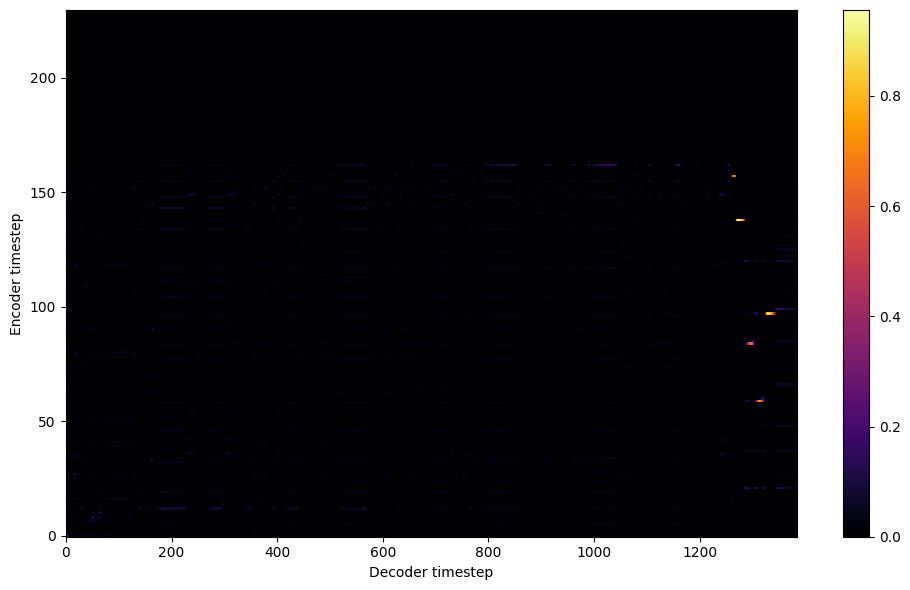

Saving model and optimizer state at iteration 113 to /content/drive/MyDrive/colab/outdir/amh_model
Model Saved

Starting Epoch: 1 Iteration: 113


  0%|          | 0/113 [00:00<?, ?it/s]

Epoch: 1 Validation loss 226:  0.339374  Time: 12.0m LR: 0.000300


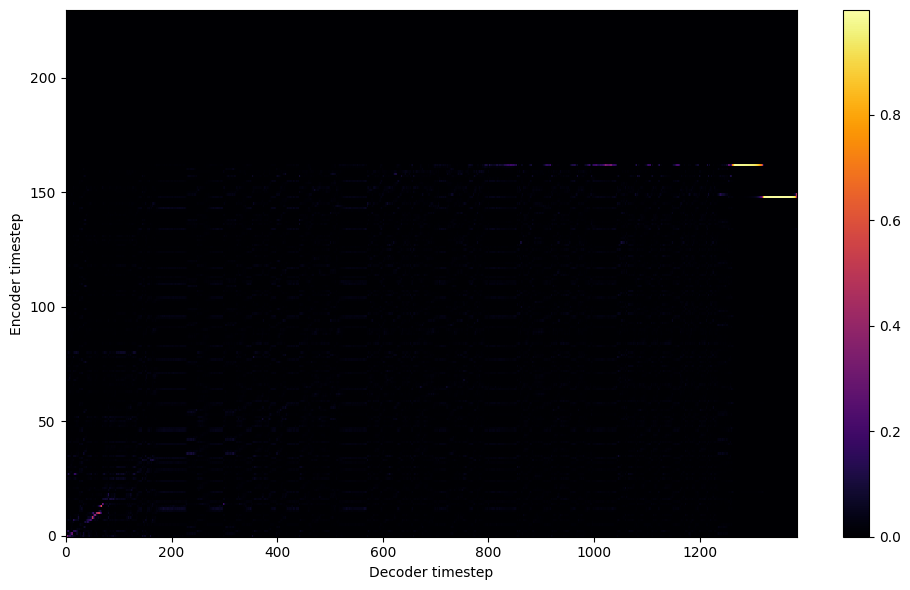

Saving model and optimizer state at iteration 226 to /content/drive/MyDrive/colab/outdir/amh_model
Model Saved

Starting Epoch: 2 Iteration: 226


  0%|          | 0/113 [00:00<?, ?it/s]

Epoch: 2 Validation loss 339:  0.333394  Time: 11.9m LR: 0.000300


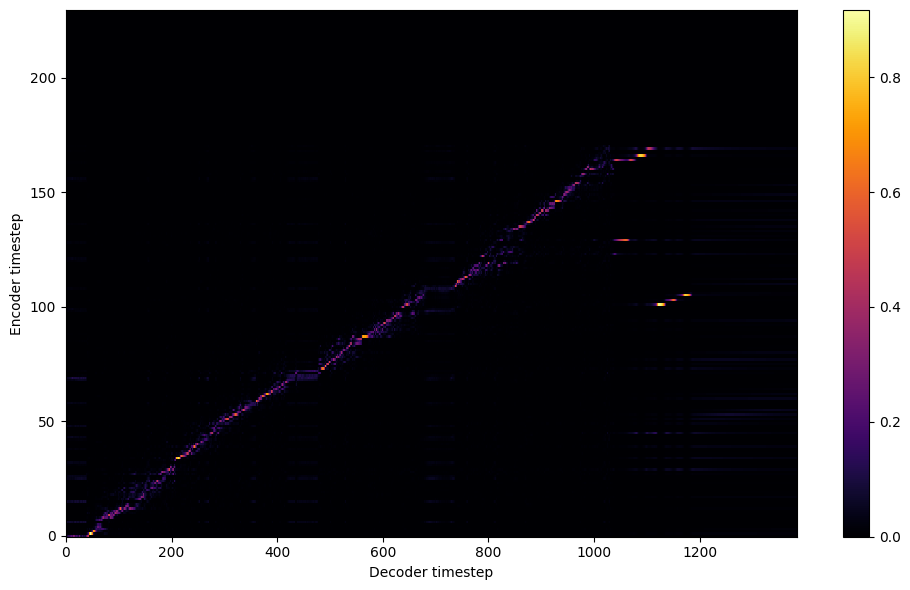

Saving model and optimizer state at iteration 339 to /content/drive/MyDrive/colab/outdir/amh_model
Model Saved

Starting Epoch: 3 Iteration: 339


  0%|          | 0/113 [00:00<?, ?it/s]

Epoch: 3 Validation loss 452:  0.298634  Time: 12.0m LR: 0.000300


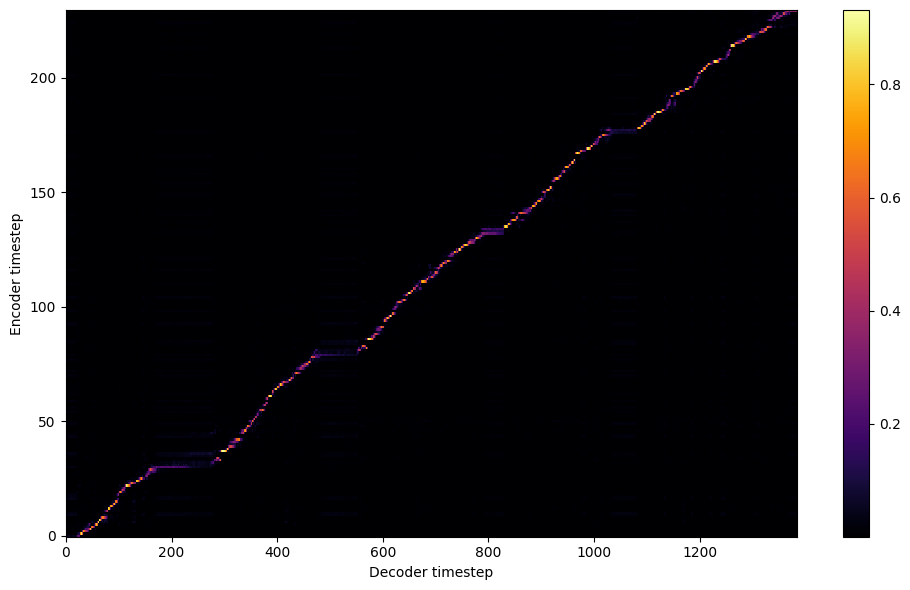

Saving model and optimizer state at iteration 452 to /content/drive/MyDrive/colab/outdir/amh_model
Model Saved

Starting Epoch: 4 Iteration: 452


  0%|          | 0/113 [00:00<?, ?it/s]

Epoch: 4 Validation loss 565:  0.292665  Time: 12.0m LR: 0.000300


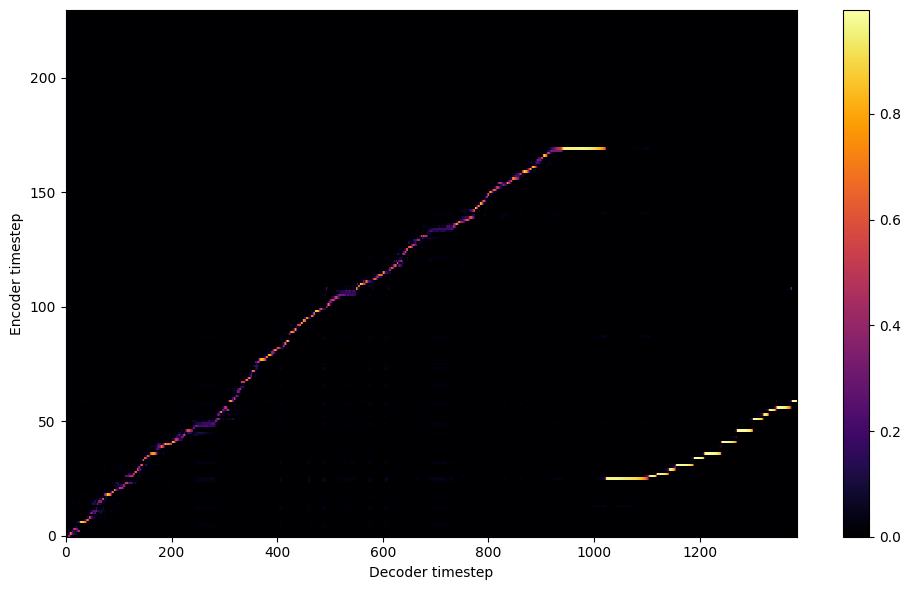

Saving model and optimizer state at iteration 565 to /content/drive/MyDrive/colab/outdir/amh_model
Model Saved
Saving model and optimizer state at iteration 565 to /content/drive/MyDrive/colab/outdir/amh_model_epoch_5
Model Saved

Starting Epoch: 5 Iteration: 565


  0%|          | 0/113 [00:00<?, ?it/s]

Epoch: 5 Validation loss 678:  0.288451  Time: 12.0m LR: 0.000300


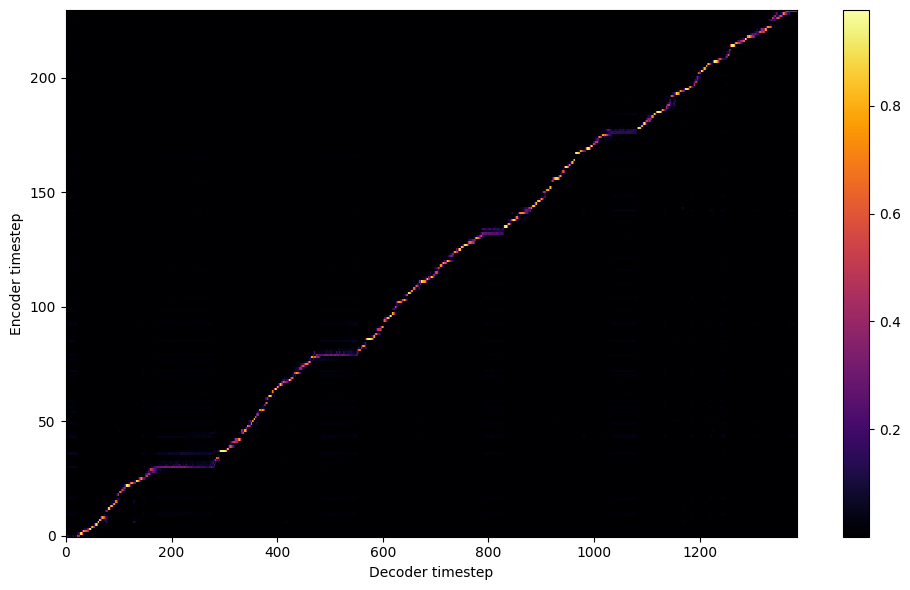

Saving model and optimizer state at iteration 678 to /content/drive/MyDrive/colab/outdir/amh_model
Model Saved

Starting Epoch: 6 Iteration: 678


  0%|          | 0/113 [00:00<?, ?it/s]

Epoch: 6 Validation loss 791:  0.276910  Time: 12.0m LR: 0.000300


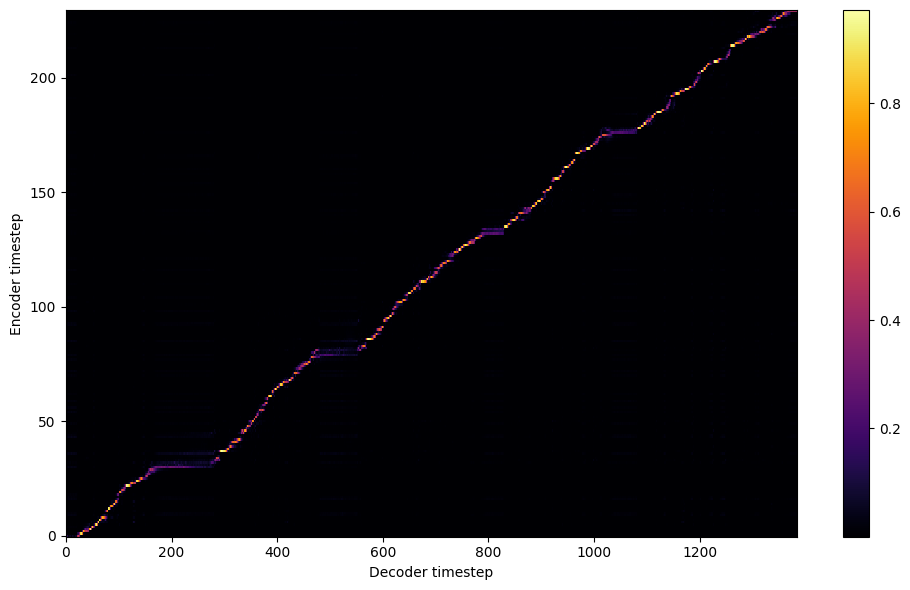

Saving model and optimizer state at iteration 791 to /content/drive/MyDrive/colab/outdir/amh_model
Model Saved

Starting Epoch: 7 Iteration: 791


  0%|          | 0/113 [00:00<?, ?it/s]

Epoch: 7 Validation loss 904:  0.282972  Time: 11.9m LR: 0.000300


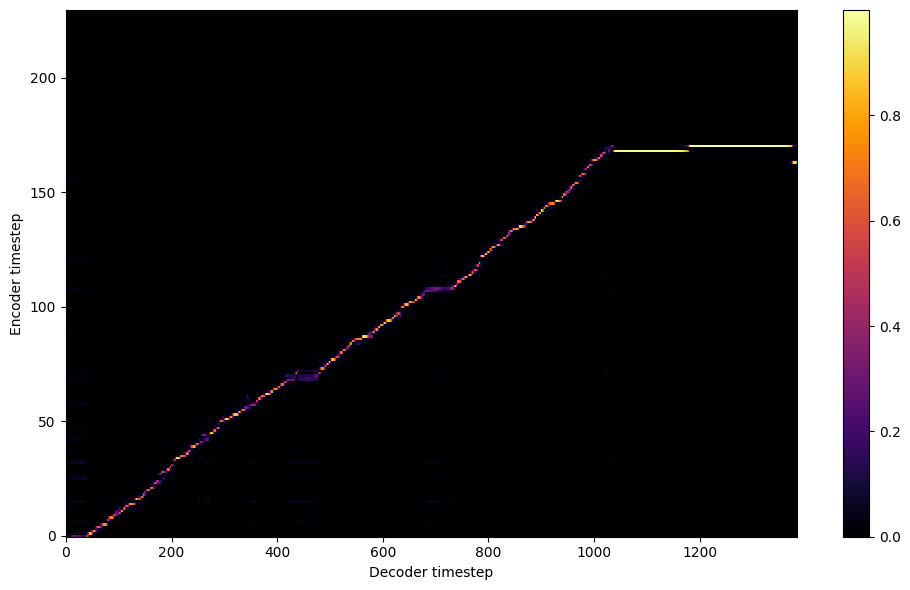

Saving model and optimizer state at iteration 904 to /content/drive/MyDrive/colab/outdir/amh_model
Model Saved

Starting Epoch: 8 Iteration: 904


  0%|          | 0/113 [00:00<?, ?it/s]

Epoch: 8 Validation loss 1017:  0.267052  Time: 12.1m LR: 0.000300


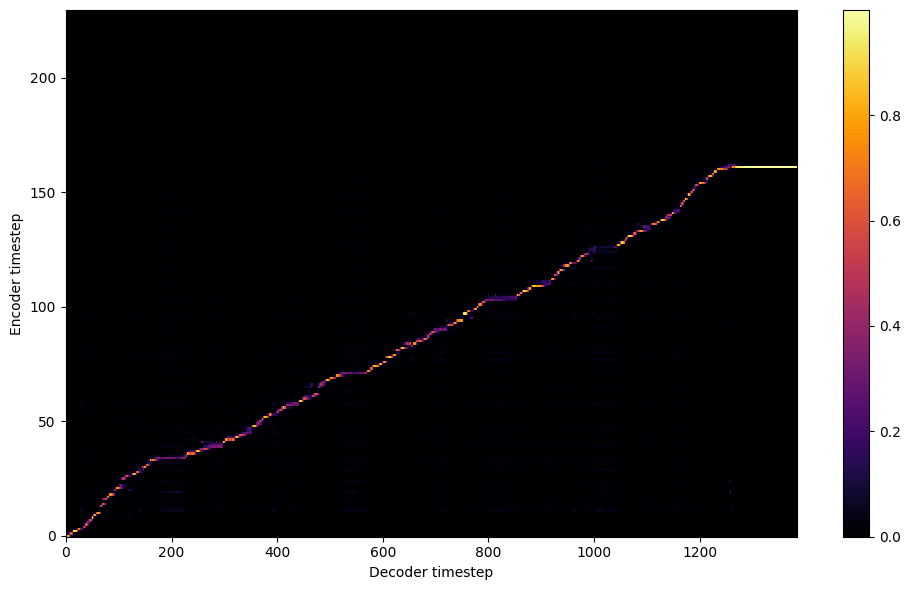

Saving model and optimizer state at iteration 1017 to /content/drive/MyDrive/colab/outdir/amh_model
Model Saved

Starting Epoch: 9 Iteration: 1017


  0%|          | 0/113 [00:00<?, ?it/s]

Epoch: 9 Validation loss 1130:  0.268616  Time: 12.1m LR: 0.000300


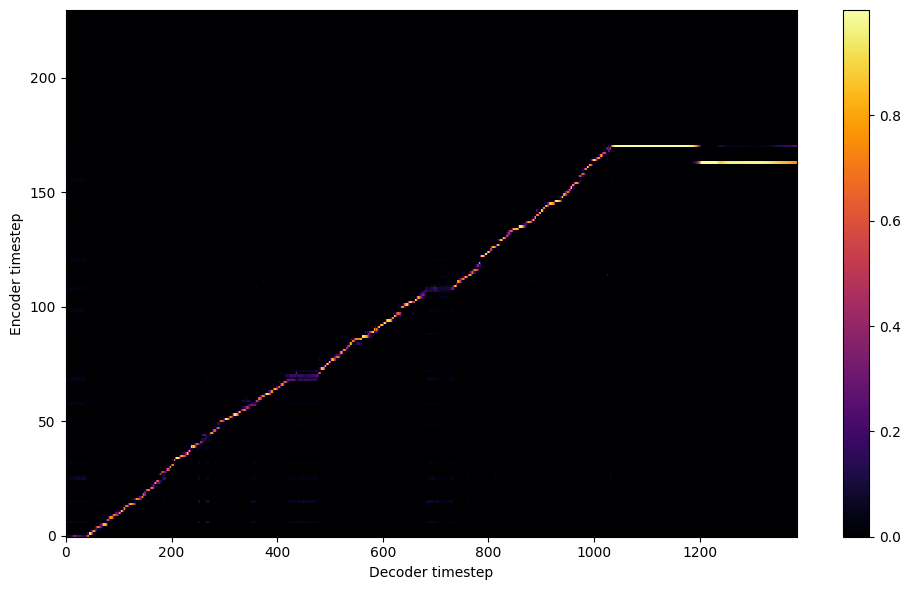

Saving model and optimizer state at iteration 1130 to /content/drive/MyDrive/colab/outdir/amh_model
Model Saved
Saving model and optimizer state at iteration 1130 to /content/drive/MyDrive/colab/outdir/amh_model_epoch_10
Model Saved

Starting Epoch: 10 Iteration: 1130


  0%|          | 0/113 [00:00<?, ?it/s]

Epoch: 10 Validation loss 1243:  0.265620  Time: 12.2m LR: 0.000300


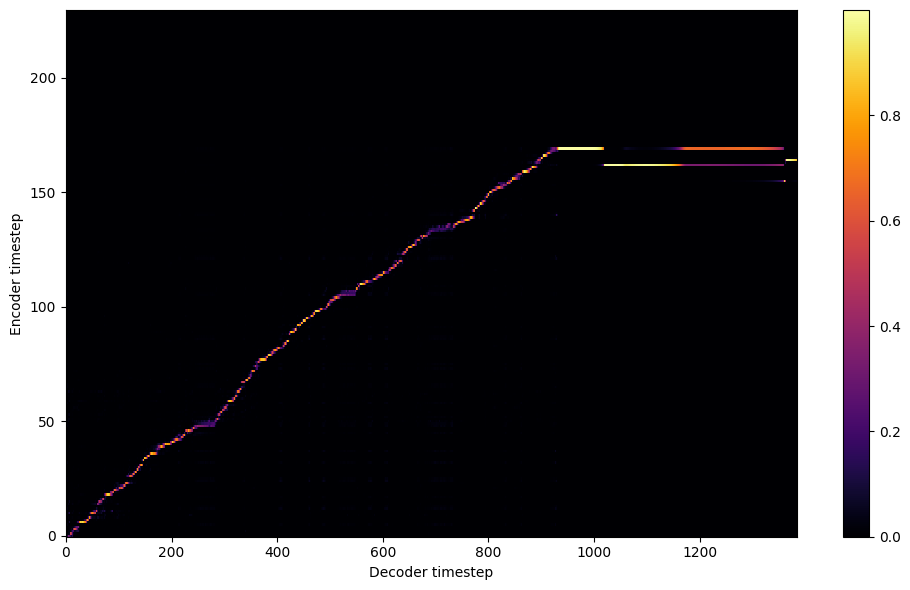

Saving model and optimizer state at iteration 1243 to /content/drive/MyDrive/colab/outdir/amh_model
Model Saved

Starting Epoch: 11 Iteration: 1243


  0%|          | 0/113 [00:00<?, ?it/s]

Epoch: 11 Validation loss 1356:  0.264338  Time: 12.2m LR: 0.000300


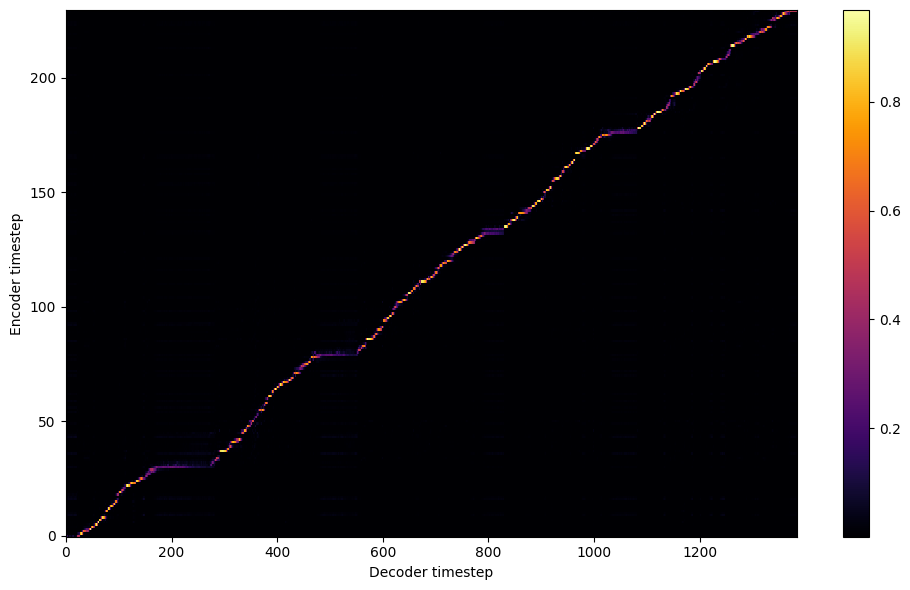

Saving model and optimizer state at iteration 1356 to /content/drive/MyDrive/colab/outdir/amh_model
Model Saved

Starting Epoch: 12 Iteration: 1356


  0%|          | 0/113 [00:00<?, ?it/s]

Epoch: 12 Validation loss 1469:  0.261322  Time: 12.2m LR: 0.000300


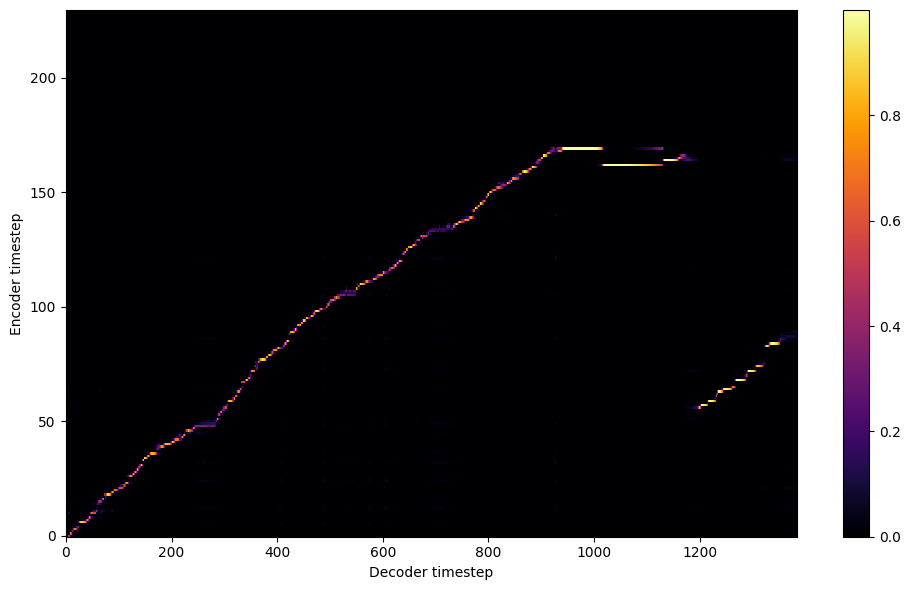

Saving model and optimizer state at iteration 1469 to /content/drive/MyDrive/colab/outdir/amh_model
Model Saved

Starting Epoch: 13 Iteration: 1469


  0%|          | 0/113 [00:00<?, ?it/s]

Epoch: 13 Validation loss 1582:  0.256851  Time: 12.1m LR: 0.000300


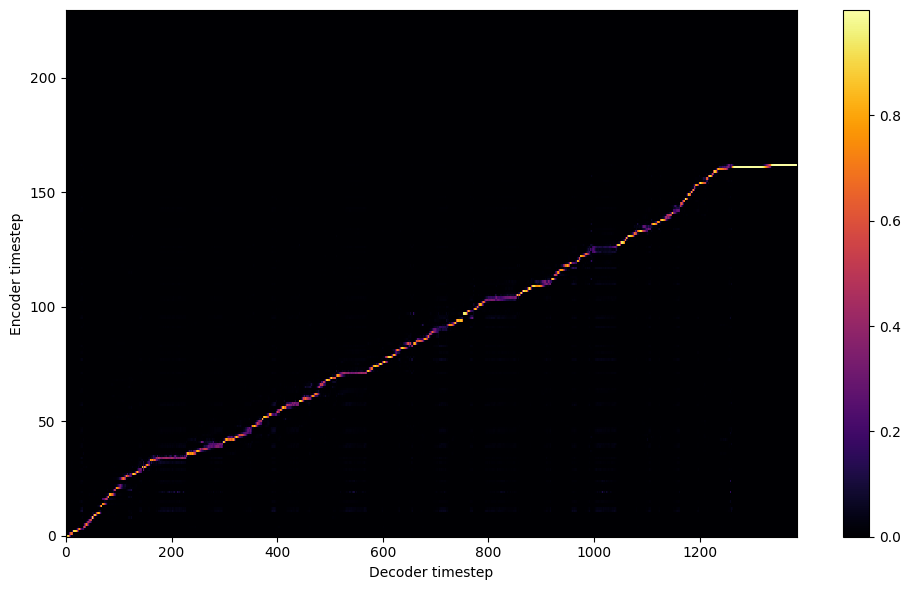

Saving model and optimizer state at iteration 1582 to /content/drive/MyDrive/colab/outdir/amh_model
Model Saved

Starting Epoch: 14 Iteration: 1582


  0%|          | 0/113 [00:00<?, ?it/s]

Epoch: 14 Validation loss 1695:  0.253006  Time: 12.2m LR: 0.000300


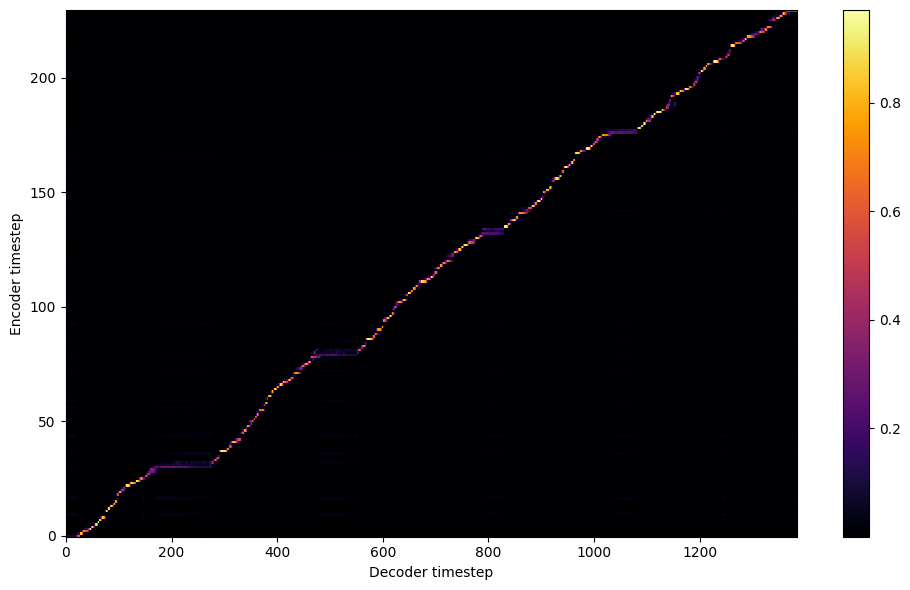

Saving model and optimizer state at iteration 1695 to /content/drive/MyDrive/colab/outdir/amh_model
Model Saved
Saving model and optimizer state at iteration 1695 to /content/drive/MyDrive/colab/outdir/amh_model_epoch_15
Model Saved

Starting Epoch: 15 Iteration: 1695


  0%|          | 0/113 [00:00<?, ?it/s]

Epoch: 15 Validation loss 1808:  0.252152  Time: 12.3m LR: 0.000300


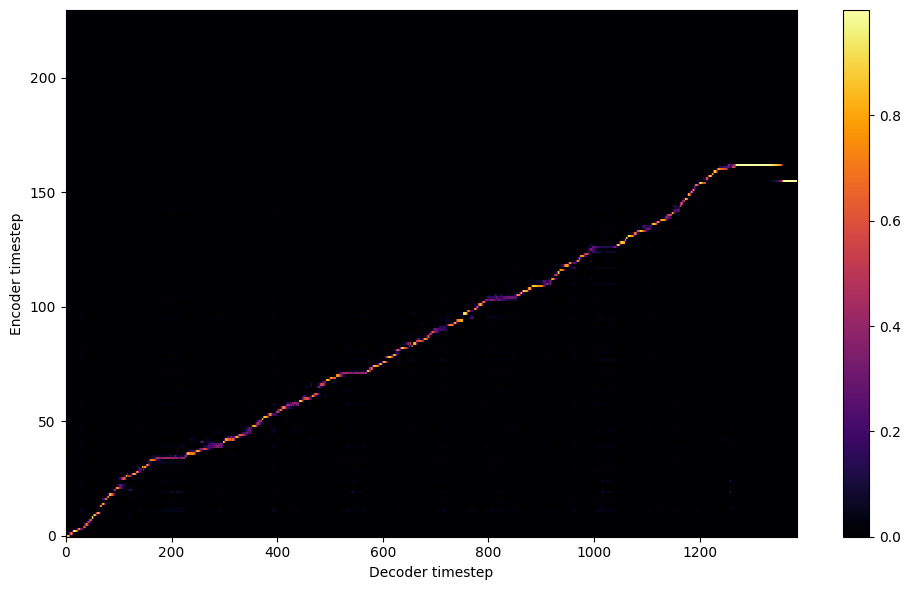

Saving model and optimizer state at iteration 1808 to /content/drive/MyDrive/colab/outdir/amh_model
Model Saved

Starting Epoch: 16 Iteration: 1808


  0%|          | 0/113 [00:00<?, ?it/s]

In [ ]:
#@markdown ## <b><font color="pink" size="+2">  **Begin training**
#@markdown ___
#@markdown ### How often to save (number of epochs)
#@markdown `10` by default. Raise this if you're hitting a rate limit. If you're using a particularly large dataset, you might want to set this to `1` to prevent loss of progress.
save_interval =  1#@param {type: "integer"}
#
#@markdown ### How often to backup (number of epochs)
#@markdown `-1` (disabled) by default. This will save extra copies of your model every so often, so you always have something to revert to if you train the model for too long. This *will* chew through your Google Drive storage.
backup_interval =  5#@param {type: "integer"}
#

print('FP16 Run:', hparams.fp16_run)
print('Dynamic Loss Scaling:', hparams.dynamic_loss_scaling)
print('Distributed Run:', hparams.distributed_run)
print('cuDNN Enabled:', hparams.cudnn_enabled)
print('cuDNN Benchmark:', hparams.cudnn_benchmark)
train(output_directory, log_directory, checkpoint_path,
      warm_start, n_gpus, rank, group_name, hparams, log_directory2,
      save_interval, backup_interval)

In [10]:
os.chdir('/content/drive/MyDrive/Operation/TTS-TT2')

JS to prevent idle timeout:

Press F12 OR CTRL + SHIFT + I OR right click on this website -> inspect.
Then click on the console tab and paste in the following code.

```javascript
function ClickConnect(){
console.log("Working");
document.querySelector("colab-toolbar-button#connect").click()
}
setInterval(ClickConnect,60000)
```